# Social Media Mining: K-Nearest Neigbors
### Vincent Malic - Spring 2018

## Classification Task

In regression problems, the target variable being predicted is a number. In classification problems, the variable being predicted is **discrete**. When a variable is discrete, it means it can take one of a finite set of values. For example, imagine a situation where we're trying to predict someone is a smoker or a non-smoker: $y \in \{\text{smoker}, \text{non-smoker}\}$. This is a *binary classification task*. There are 2 options for the dependent variable, and one usually indicates the presence (e.g. smoking) and the other indicates the absence (e.g. non-smoking) of an attribute. Many classifiers in the medical world are binary: $y \in \{\text{HIV-positive}, \text{HIV-negative}\}$. When there are more than 2 possible values for the dependent variable, we have a *multiclass classification task*. For example, if we want to predict the weather: $y \in \{\text{rain}, \text{cloudy}, \text{partly cloudy}, \text{clear}\}$.  

In this notebook we're going to learn how to make a multiclass classifier using a method known as **k-Nearest Neighbors**. 

## 1. Import Python Libraries

In [1]:
from matplotlib.colors import ListedColormap
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.ioff()

## 1.2 Examine Iris Data
* Load scikit-learn's built-in dataset, ``iris``
* Dataset includes 150 datapoints.
* Features, sepal length, sepal width, petal length, petal width, species. 

### Task:
* Predict *species of iris* by looking at *sepal length and sepal width*. 
* Note: Flower *sepal* is green leaf-like structures that *behind* petals.

In [2]:
# Load iris dataset; X has 150 rows with 4 columns. 
# Here, we extract only the first two columns.

iris = datasets.load_iris() 
X = iris.data[:, :2] 
y = iris.target

### Features are contained in X as an $150 \times 2$ array.
* Each row represents the measuresments of a specific flower. 
* First column is sepal length in cm., second is sepal width in cm. 

In [3]:
print(X.shape)

(150, 2)


### Target Variables ``y`` contains the labels. 
Note: the set of values is 0, 1, and 2.
* 0 represents the species *I. setosa*, 
* 1 represents *I. versicolor*, and 
* 2 represents *I. virginica*.

In [4]:
print(y.shape)
print(y)

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

## 1.3 Plot the Data
* Although there are 4 measurements available for each data point, I picked only two so we could visualize them. 


### Create a scatterplot
* X-axis is sepal length, the y-axis is sepal width, 
* Each dot represents the measurements of a specific flower-a data point. 
* The color of the dot represents its species. 

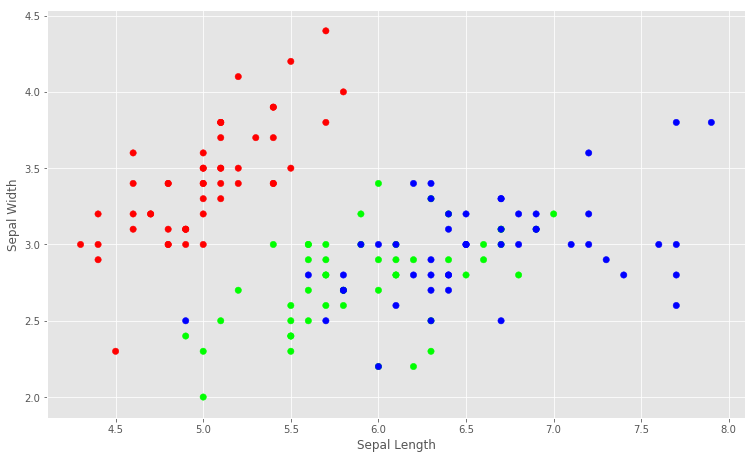

In [6]:
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

fig, ax = plt.subplots()
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, s=40)
fig.set_size_inches(12.5, 7.5)
fig

### Interpretation
* Species Setosa (red), is easy to identify as it is distinct, looking at the graph. 
* Overlap between Versicolog (green) and Virginica (blue) species makes it more challenging to classify.   
* Classifying a flower that has a sepal length between 5.5 and 7.0 cm and a sepal width between 2.0 and 3.5 cm will be tough. 

# 2. K-Nearest Neighbors Method

## Multiclass Classification Task 
Pick one of the dots on the plot above, and pretend you don't know what species it belongs to - you don't know what color it is on the plot. Now imagine your task is to figure what species/color it *should* be. You have three options: red, green, and blue. This is a 

One of the easiest and most intuitive ways to approach this task is simply to ask: what is the color of the known data point that's closest to it? If the closest point to our unknown data point is blue, then assign blue to the unknown one. If it's read, assign red, and so on. This is called the 1-Nearest Neighbor method.

Let's say the nearest point to the unknown point is red, so we assign it a label of "red." But what if the second nearest neighbor is blue? And the third-nearest? And fourth and fifth nearest? True, the nearest one is red, but the next 4 nearest are blue. Maybe we should consider the fact that *most* neighbors are blue, and therefore assign blue. This is the 5-Nearest Neighbors method: we're looking at the 5 nearest neighbors and picking the majority label.

Let's try using k-NN with scikit learn.

## 2.1 Initialize an Empty Classifier
* Import ``KNearestNeighborsClassifier()`` method from scikit learn
* A *factory* for creating classifiers, not a classifier itself.
* First, we have to initialize an empty, untrained k-NN classifier (`clf`). 

In [12]:
clf = KNeighborsClassifier(n_neighbors=1)

### Model Argument: Number of Neighbors (k)
* Classifier method *takes an argument* called ``n_neighbors``(e.g., K=1) 

### Model Parameters
* Settings designated before the model can be trained. 
* *How many neighbors to consider when deciding the class of a point?* set 

## 2.2. Fit Model to the Data
* Train the classifier using the ``fit`` method 
* Pass it the features and the labels.

In [13]:
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### Classifier is now trained. 
* Using``predict`` method, and pass two features - sepal length and sepal width - and it will predict a label. 
* Specifically, it will look at what the nearest neighbor to that point is and assign it that neighbor's label. 

## 2.3 Visualize *decision boundary* on original plot: 
* Decision boundaries indicate where a classifier will classify new data points differently. 
* If you're on A's side of the boundary, you'll be classified as A. 
* If you're on B, you'll be classified as B. 

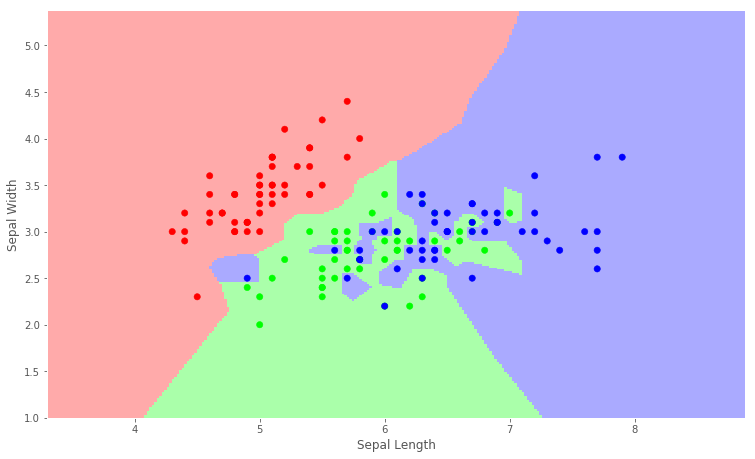

In [10]:
fig.clf()
ax = fig.add_subplot(111)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, s=40)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
fig

### Decision boundary
* Imagine you find a new flower and measure it's sepal length and width.
* Plot it on chart, and see what the background color of that spot is. 
* Assign it to that color's species. 

In [19]:
clf.predict([6.2, 2.4])

//anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

## Classification Errors
Note: some of you might notice that there are blue dots on green territory. For example, at the coordinates ``(6, 2.2)`` there's a blue dot inside green territory that has no blue blob around it. This might strike you as not making sense, since if we're deciding by looking at the closest neighbor, then there should be a blue blob surrounding it. Just to clarify, the 4 instances where you see a blue dot in green territory, there's also a green dot with the *exact same measurements* under it. It's just not being displayed since it's under the blue dot. 

### Deciding Ties
* In instances where there's a tie, scikit learn just chooses the first category in the listing of labels
* Greens are represented by the number 1 and the blues by the number 2
* Scikit learn assigns ties between blue and green to green territory

## 2.4 Adjust Model Parameters: k in k-NN
* How does decision boundary change when adjusting the number of neighbors?
* Train new classifier, but when we initialize it we'll ``n_neighbors`` to 15 instead of 1. 

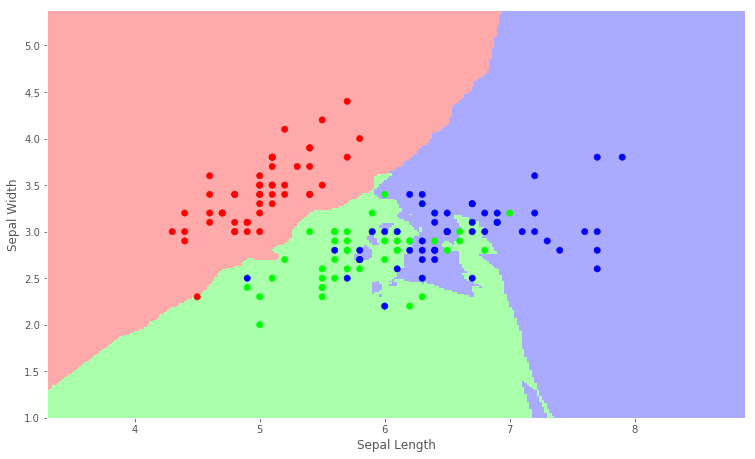

In [35]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X, y)
fig.clf()
ax = fig.add_subplot(111)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, s=40)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
fig

### Adjusting Parameter K: Number of Neighbors
* Smaller values of K provide pockets and islands of individual cases 
* As k increases, boundaries get smoother, but more "exceptions"
* Try very large value for k. We'll try k = 50

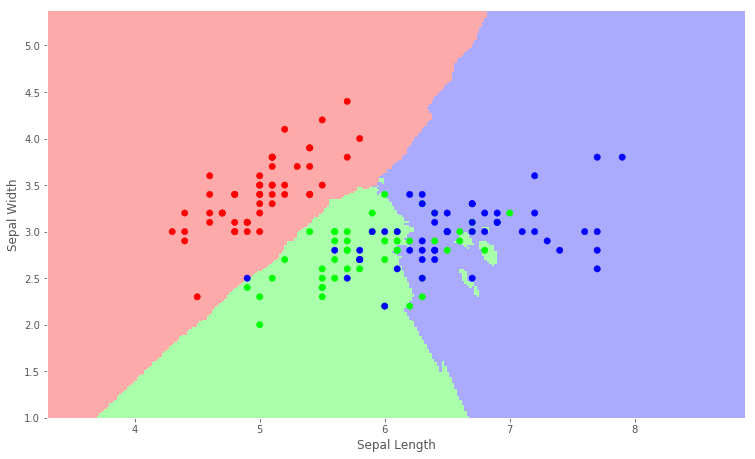

In [36]:
clf = KNeighborsClassifier(n_neighbors=15)
clf.fit(X, y)
fig.clf()
ax = fig.add_subplot(111)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, s=40)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
fig

Now the decision boundaries are almost straight lines. We have a "cleaner" model, but the propensity for "exceptional" flowers that get misclassed is higher. 

### As values of K increase
* Decision boundary gets smoother
* Effect of outliers and overlapping areas decreases
* Lose detail in classification

### As values of K increase
* Decision boundaries become more jagged
* Outliers and areas of overlap lead to more detailed, complex classification
* More susceptible to noise

## How do we pick a good value of k?
* Generally, some ideal value of k that incorporates a good amount of information from a point's neighborhood but also isn't so high that the detail in the decision boundaries is lost. 
* Finding a good value for k belongs to the realm of validation and evaluation. We'll cover that next. 

